# Deeplearning


In [1]:
# Import necessary packages.
!pip install torch torchvision numpy matplotlib tqdm
import numpy as np
from PIL import Image
import os
import zipfile
import torch
import torch.nn as nn
from torch.utils.data import random_split
from torch.utils.data import DataLoader, Subset

import torchvision
from torchvision import datasets
from torchvision.datasets import DatasetFolder
import torchvision.transforms as transforms

# This is for the progress bar
from tqdm.auto import tqdm
# This is for ploting
import matplotlib.pyplot as plt


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [2]:
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))
else:
    print("CUDA is not available")

Tesla T4


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
with zipfile.ZipFile('/content/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('./data')

In [5]:
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the images
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [6]:
import os
from torchvision import datasets

# Define the absolute paths to the train and test directories
train_dir = '/content/data/train'
test_dir = '/content/data/test'
# Now you can load the datasets using the absolute paths
trainset = datasets.ImageFolder(root=train_dir, transform=train_transform)
testset = datasets.ImageFolder(root=test_dir, transform=test_transform)


In [ ]:
trainset.samples

In [8]:
from torch.utils.data import DataLoader

train_loader = DataLoader(trainset, batch_size=32, shuffle=True)
test_loader = DataLoader(testset, batch_size=32, shuffle=False)

In [9]:
# Define the desired ratio for train and evaluation data (e.g., 90% train, 10% evaluation)
train_ratio = 0.9
val_ratio = 0.1

# Calculate the sizes of train and evaluation datasets based on the ratios
train_size = int(train_ratio * len(trainset))
val_size = len(trainset) - train_size

# Split the train dataset into train and evaluation subsets
train_subset, val_subset = random_split(trainset, [train_size, val_size])

print(f'Original train set has {len(trainset)} samples')
print(f'Train set has {len(train_subset)} samples')
print(f'Validation set has {len(val_subset)} samples')
print(f'Test set has {len(testset)} samples')

Original train set has 100000 samples
Train set has 90000 samples
Validation set has 10000 samples
Test set has 20000 samples


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


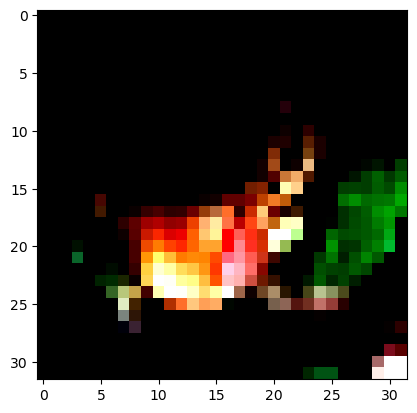

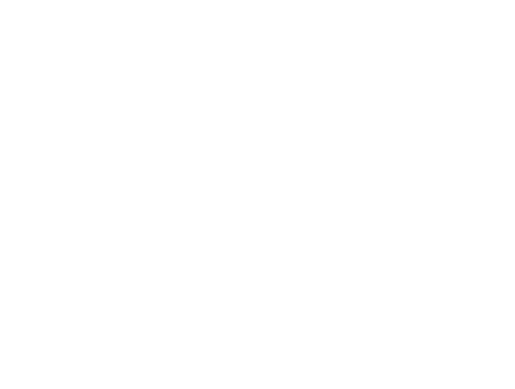

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


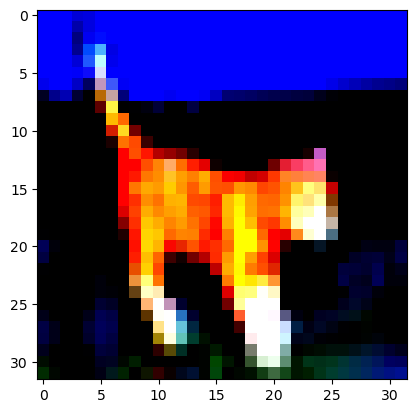

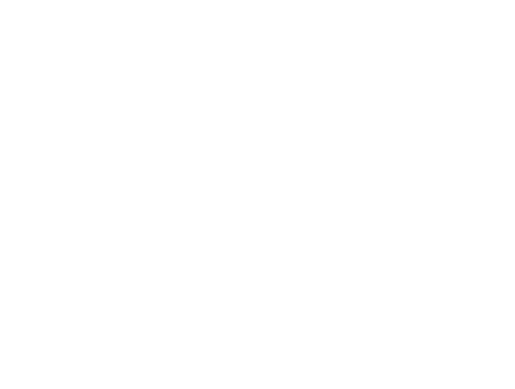

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


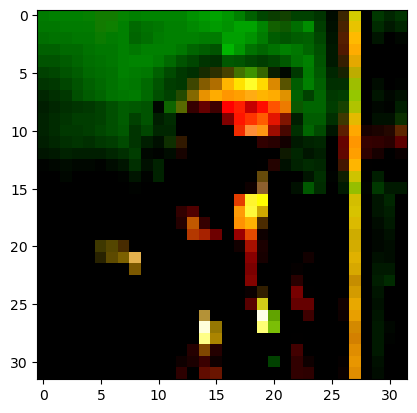

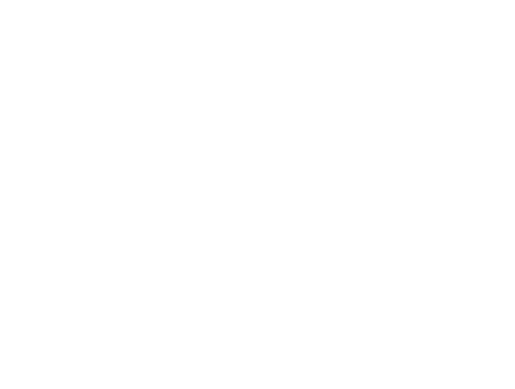

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


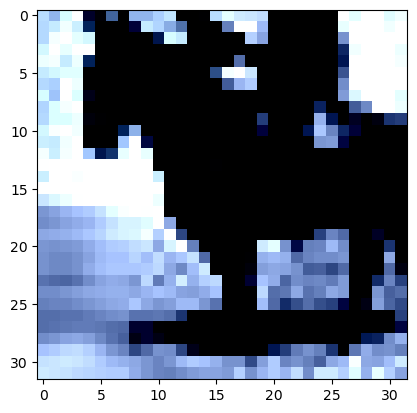

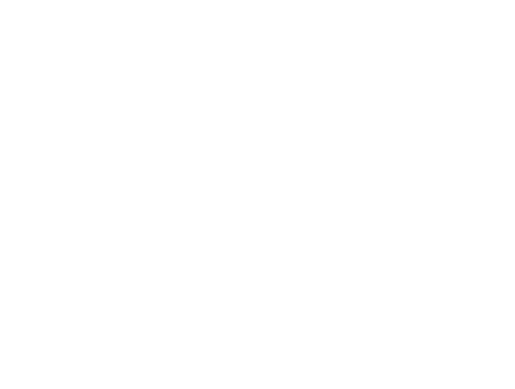

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


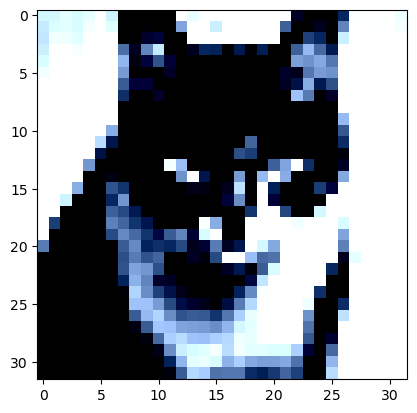

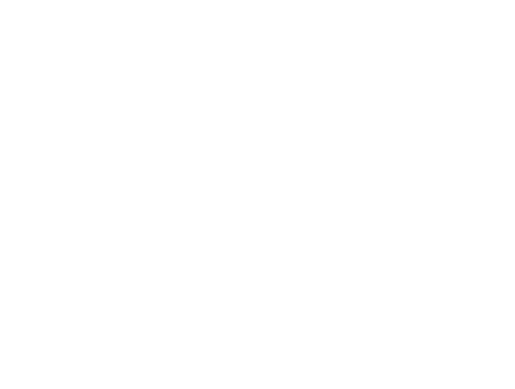

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

# Assuming train_subset is already defined
# Create a dataset and data loader for visualization
train_loader_for_vis = DataLoader(train_subset, batch_size=5, shuffle=True, num_workers=0)

# Get a batch of training data
inputs, classes = next(iter(train_loader_for_vis))

# Define the imshow function without normalization
def imshow_no_norm(inp, title=None):
    """Display image for Tensor without normalization."""
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

# Display individual images from the batch
for i in range(inputs.size(0)):
    imshow_no_norm(inputs[i])
    plt.axis('off')
    plt.show()


In [ ]:
len(trainset)

100000

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


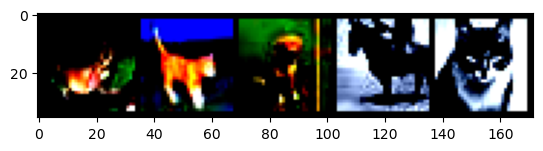

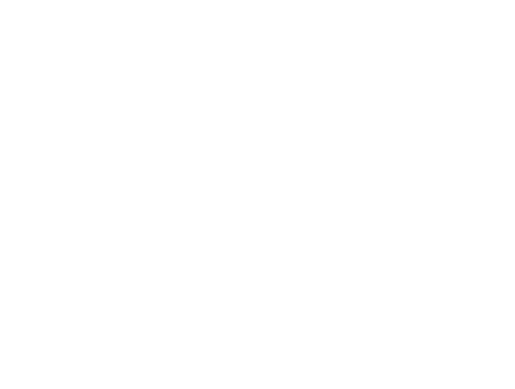

In [ ]:
# Create a grid from the batch
out = torchvision.utils.make_grid(inputs)

# Display the grid of images without normalization
imshow_no_norm(out)
plt.axis('off')
plt.show()

In [10]:
# Batch size for training, validation, and testing.
# A greater batch size usually gives a more stable gradient.
# But the GPU memory is limited, so please adjust it carefully.
batch_size = 32

# Construct data loaders
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
valid_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False)

tensor([0, 0, 1, 0, 1])
torch.Size([3, 228, 1132])


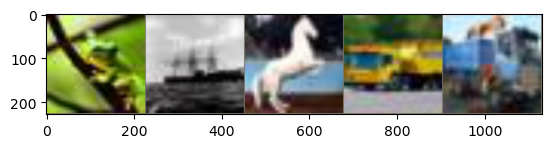

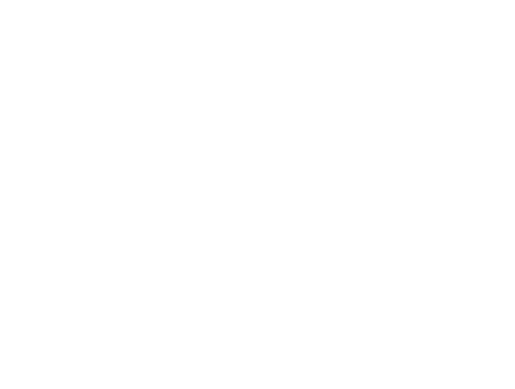

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

# Define the imshow function
def imshow(inp, title=None):
    """Display image for Tensor."""
    print(inp.shape)
    # Convert from Tensor image
    inp = inp.numpy().transpose((1, 2, 0))

    # Denormalize if needed (assuming ImageNet normalization)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)  # Clip to make sure values are in the correct range

    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # Pause a bit so that plots are updated

# Create a dataset and data loader for visualization
# Assuming train_subset is already defined
train_loader_for_vis = DataLoader(train_subset, batch_size=5, shuffle=True, num_workers=0)

# Get a batch of training data
inputs, classes = next(iter(train_loader_for_vis))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

# Display the classes
print(classes)

# Display the image grid
imshow(out)

# Add axis and display settings for clarity
plt.axis('off')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([1, 0, 0, 0, 0])


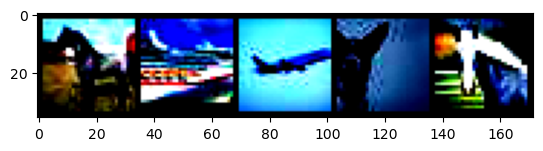

In [ ]:
# show some samples
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
train_loader_for_vis = DataLoader(train_subset, batch_size=5, shuffle=True, num_workers=0)
inputs, classes = next(iter(train_loader_for_vis))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)


print(classes)
imshow(out)

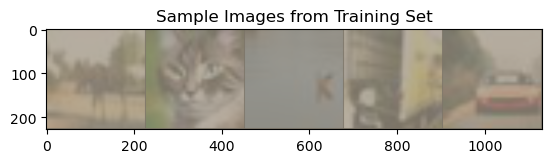

Classes:  tensor([1, 0, 0, 1, 0])


In [ ]:
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np

# Define a function to denormalize and display an image
def imshow(inp, title=None):
    """ Display image for Tensor. """
    inp = inp.numpy().transpose((1, 2, 0))  # Rearrange dimensions to height x width x channels
    mean = np.array([0.485, 0.456, 0.406])  # Normalization mean used during training/preprocessing
    std = np.array([0.229, 0.224, 0.225])   # Normalization std used during training/preprocessing
    inp = std * inp + mean  # Denormalize
    inp = np.clip(inp, 0, 1)  # Clip values to be between 0 and 1
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Assume train_subset is already defined and loaded correctly
train_loader_for_vis = DataLoader(train_subset, batch_size=5, shuffle=True, num_workers=2)

# Get a batch of training data
inputs, classes = next(iter(train_loader_for_vis))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

# Show images
imshow(out, title="Sample Images from Training Set")

# Optionally, you can print the classes of the images displayed
print('Classes: ', classes)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Real Images:


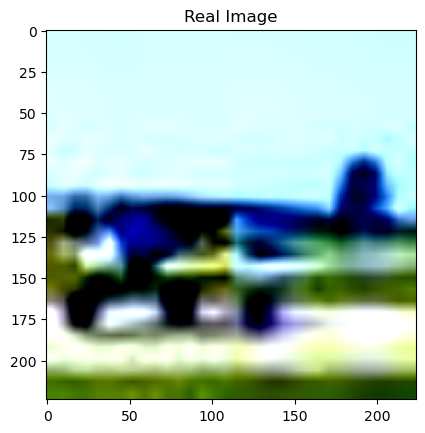

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


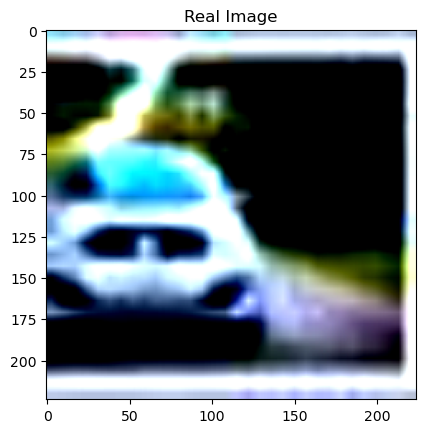

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


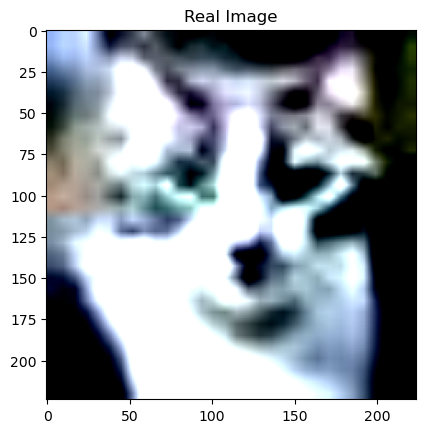

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


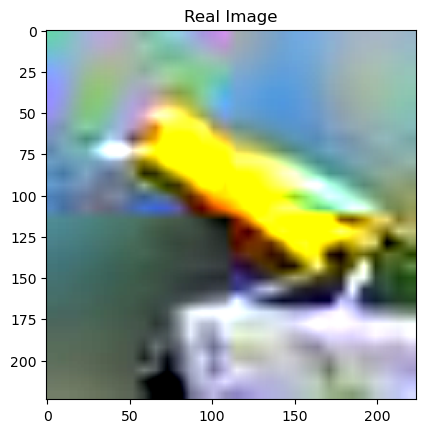

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


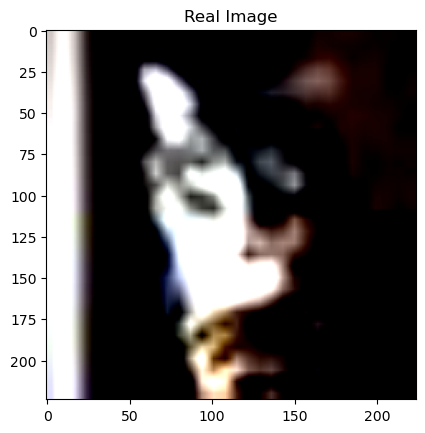

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fake Images:


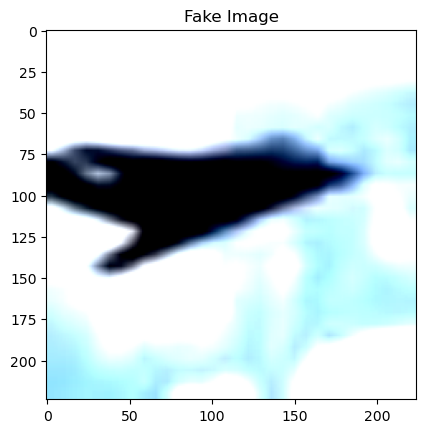

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


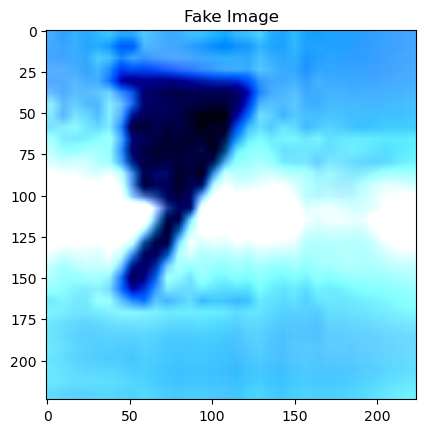

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


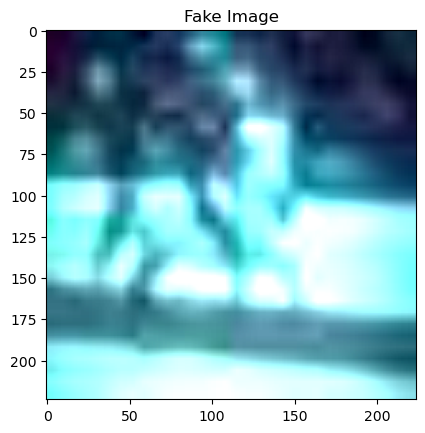

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


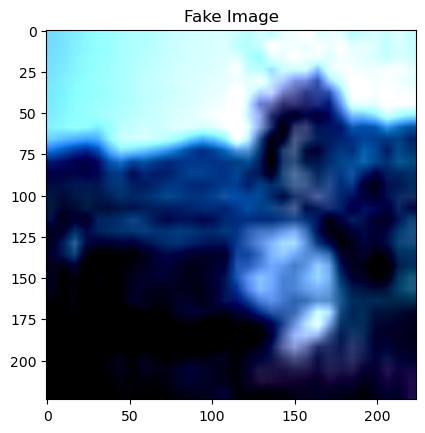

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


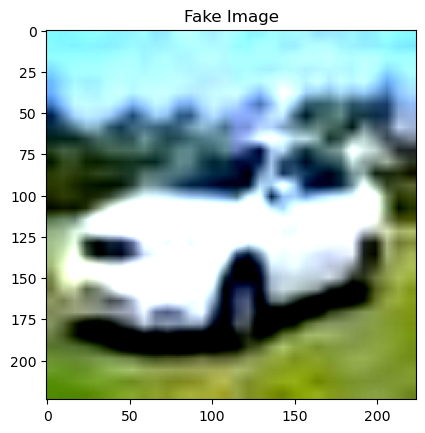

In [ ]:
# Function to unnormalize and show an image
def imshow(img, title):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Select real and fake images
real_images = images[labels == 0][:5]  # Assuming label 0 is real
fake_images = images[labels == 1][:5]  # Assuming label 1 is fake

# Print real images
print("Real Images:")
for i in range(len(real_images)):
    imshow(real_images[i], title="Real Image")

# Print fake images
print("Fake Images:")
for i in range(len(fake_images)):
    imshow(fake_images[i], title="Fake Image")

# CNN

In [12]:
class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        # The arguments for commonly used modules:
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
        # torch.nn.MaxPool2d(kernel_size, stride, padding)

        # input image size: [3, 224, 224]
        self.cnn_layers = nn.Sequential(
            nn.Conv2d(3, 64, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),

            nn.Conv2d(64, 128, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),

            nn.Conv2d(128, 256, 3, 1, 1), # TODO: set a convolution layer with out_channels=256, kernel_size=3, stride=1, padding=1
            nn.ReLU(),
            nn.MaxPool2d(4, 4, 0), # TODO: set a max pooling layer with kernel_size=4, stride=4, padding=0
        )

        self.fc_layers = nn.Sequential(
            nn.Linear(256*14*14, 256), # TODO: fill in the correct input feature size after flatten. The tensor shape before flatten is (256, 14, 14)
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 7)
        )

    def forward(self, x):
        # input (x): [batch_size, 3, 224, 224]
        # output: [batch_size, 7]

        # Extract features by convolutional layers.
        x = self.cnn_layers(x)

        # The extracted feature map must be flatten before going to fully-connected layers.
        x = x.flatten(1)

        # The features are transformed by fully-connected layers to obtain the final logits.
        x = self.fc_layers(x)
        return x

In [13]:
# "cuda" only when GPUs are available.
device = "cuda" if torch.cuda.is_available() else "cpu"

# Initialize a model, and put it on the device specified.
model = MyCNN()
model = model.to(device)

In [14]:
# For the classification task, we use cross-entropy as the measurement of performance.
criterion = nn.CrossEntropyLoss()

# Initialize optimizer, you may fine-tune some hyperparameters such as learning rate on your own.
optimizer = torch.optim.Adam(model.parameters(), lr=0.0003)

In [ ]:
# !pip install --upgrade ipywidgets
# !jupyter nbextension enable --py widgetsnbextension --sys-prefix


In [15]:
# The number of training epochs.
n_epochs = 10

# These are used to record information
best_valid_acc = 0
train_loss_epochs = []
train_acc_epochs = []
valid_loss_epochs = []
valid_acc_epochs = []

for epoch in range(n_epochs):

    # ---------- Training ----------
    # Make sure the model is in train mode before training.
    model.train()

    # These are used to record information in training.
    train_loss = []
    train_accs = []

    # Iterate the training set by batches.
    for batch in tqdm(train_loader):

        # Gradients stored in the parameters in the previous step should be cleared out first.
        optimizer.zero_grad()

        # A batch consists of image data and corresponding labels.
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Forward the data. (Make sure data and model are on the same device.)
        logits = model(imgs)

        # Calculate the cross-entropy loss.
        # We don't need to apply softmax before computing cross-entropy as it is done automatically.
        loss = criterion(logits, labels)

        # Compute the gradients for parameters.
        loss.backward()

        # Update the parameters with computed gradients.
        optimizer.step()

        # Compute the accuracy for current batch.
        acc = (logits.argmax(dim=-1) == labels).float().mean()

        # Record the loss and accuracy.
        train_loss.append(loss.item())
        train_accs.append(acc.item())

    # The average loss and accuracy of the training set is the average of the recorded values.
    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)
    train_loss_epochs.append(train_loss)
    train_acc_epochs.append(train_acc)

    # ---------- Validation ----------
    # Make sure the model is in eval mode so that some modules like dropout are disabled and work normally.
    model.eval()

    # These are used to record information in validation.
    valid_loss = []
    valid_accs = []

    # Iterate the validation set by batches.
    for batch in tqdm(valid_loader):

        # A batch consists of image data and corresponding labels.
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # We don't need gradient in validation.
        # Using torch.no_grad() accelerates the forward process.
        with torch.no_grad():
          logits = model(imgs)

        # We can still compute the loss (but not the gradient).
        loss = criterion(logits, labels)

        # Compute the accuracy for current batch.
        acc = (logits.argmax(dim=-1) == labels).float().mean()

        # Record the loss and accuracy.
        valid_loss.append(loss.item())
        valid_accs.append(acc.item())

    # The average loss and accuracy for entire validation set is the average of the recorded values.
    valid_loss = sum(valid_loss) / len(valid_loss)
    valid_acc = sum(valid_accs) / len(valid_accs)
    valid_loss_epochs.append(valid_loss)
    valid_acc_epochs.append(valid_acc)

    # save the best model
    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        torch.save(model.state_dict(), 'best_model.pth')

    # Print the information.
    print(f"[Epoch: {epoch + 1:03d}/{n_epochs:03d}] Train: loss={train_loss:.5f}, acc={train_acc:.5f} | Valid: loss={valid_loss:.5f}, acc={valid_acc:.5f}")

  0%|          | 0/2813 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

[Epoch: 001/010] Train: loss=0.28447, acc=0.87683 | Valid: loss=0.18389, acc=0.92572


  0%|          | 0/2813 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

[Epoch: 002/010] Train: loss=0.15444, acc=0.94004 | Valid: loss=0.13978, acc=0.94669


  0%|          | 0/2813 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

[Epoch: 003/010] Train: loss=0.10727, acc=0.95874 | Valid: loss=0.15817, acc=0.94149


  0%|          | 0/2813 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

[Epoch: 004/010] Train: loss=0.07065, acc=0.97309 | Valid: loss=0.16517, acc=0.94279


  0%|          | 0/2813 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

[Epoch: 005/010] Train: loss=0.04398, acc=0.98336 | Valid: loss=0.16505, acc=0.94988


  0%|          | 0/2813 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

[Epoch: 006/010] Train: loss=0.03018, acc=0.98897 | Valid: loss=0.19592, acc=0.94968


  0%|          | 0/2813 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

[Epoch: 007/010] Train: loss=0.02349, acc=0.99160 | Valid: loss=0.22770, acc=0.94818


  0%|          | 0/2813 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

[Epoch: 008/010] Train: loss=0.01990, acc=0.99311 | Valid: loss=0.24167, acc=0.94479


  0%|          | 0/2813 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

[Epoch: 009/010] Train: loss=0.01604, acc=0.99447 | Valid: loss=0.22336, acc=0.95357


  0%|          | 0/2813 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

[Epoch: 010/010] Train: loss=0.01501, acc=0.99489 | Valid: loss=0.21378, acc=0.95118


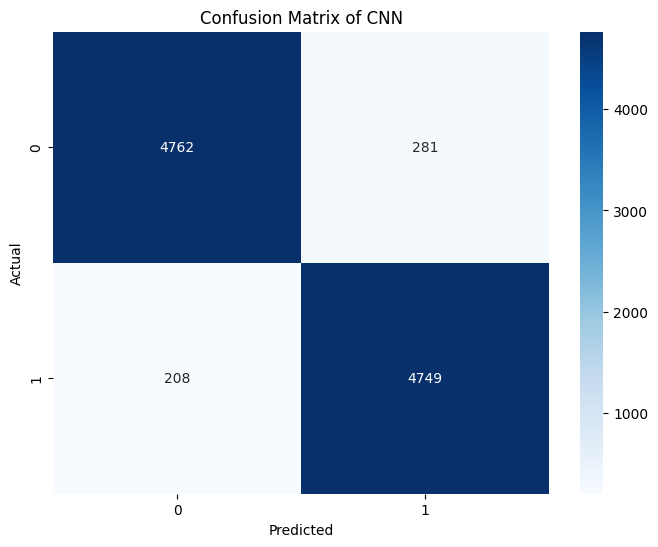

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize lists to collect all true labels and predictions
all_labels = []
all_preds = []

# Set the model to evaluation mode
model.eval()

# Disable gradient computation for inference
with torch.no_grad():
    for batch in valid_loader:
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)

        # Forward pass
        logits = model(imgs)

        # Get the predictions
        preds = logits.argmax(dim=-1)

        # Collect labels and predictions
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

# Compute the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of CNN')
plt.show()


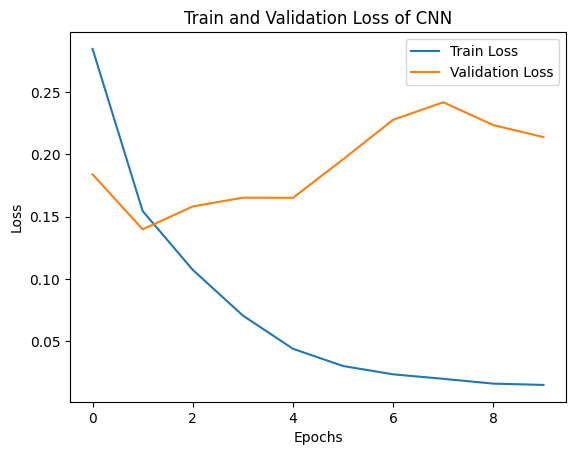

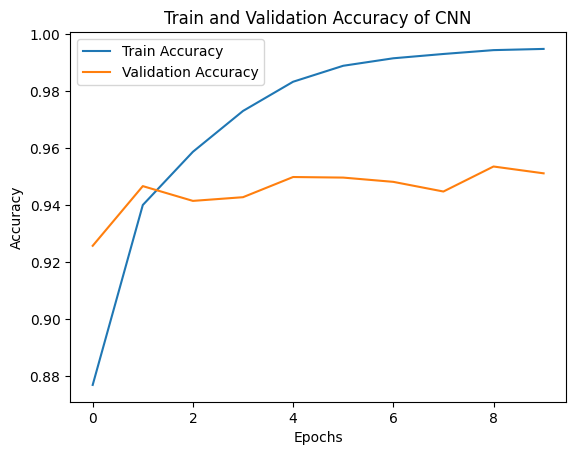

In [19]:
# Plotting the loss curves
plt.figure()
plt.plot(train_loss_epochs, label='Train Loss')
plt.plot(valid_loss_epochs, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Validation Loss of CNN')
plt.legend()
plt.show()

# Plotting the accuracy curves
plt.figure()
plt.plot(train_acc_epochs, label='Train Accuracy')
plt.plot(valid_acc_epochs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train and Validation Accuracy of CNN')
plt.legend()
plt.show()

In [20]:
# These are used to record information
best_valid_acc = 0
train_loss_epochs = []
train_acc_epochs = []
valid_loss_epochs = []
valid_acc_epochs = []
valid_precision_epochs = []
valid_recall_epochs = []
valid_f1_epochs = []

all_preds_epochs = []
all_labels_epochs = []

for epoch in range(n_epochs):

    # ---------- Training ----------
    model.train()
    train_loss = []
    train_accs = []

    for batch in tqdm(train_loader):
        optimizer.zero_grad()
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)
        logits = model(imgs)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        acc = (logits.argmax(dim=-1) == labels).float().mean()
        train_loss.append(loss.item())
        train_accs.append(acc.item())

    train_loss = sum(train_loss) / len(train_loss)
    train_acc = sum(train_accs) / len(train_accs)
    train_loss_epochs.append(train_loss)
    train_acc_epochs.append(train_acc)

    # ---------- Validation ----------
    model.eval()
    valid_loss = []
    valid_accs = []
    all_preds = []
    all_labels = []

    for batch in tqdm(valid_loader):
        imgs, labels = batch
        imgs = imgs.to(device)
        labels = labels.to(device)
        with torch.no_grad():
            logits = model(imgs)
        loss = criterion(logits, labels)
        acc = (logits.argmax(dim=-1) == labels).float().mean()
        valid_loss.append(loss.item())
        valid_accs.append(acc.item())
        all_preds.extend(logits.argmax(dim=-1).cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    valid_loss = sum(valid_loss) / len(valid_loss)
    valid_acc = sum(valid_accs) / len(valid_accs)
    valid_loss_epochs.append(valid_loss)
    valid_acc_epochs.append(valid_acc)

    all_preds_epochs.append(all_preds)
    all_labels_epochs.append(all_labels)

    precision = precision_score(all_labels, all_preds, average='binary')
    recall = recall_score(all_labels, all_preds, average='binary')
    f1 = f1_score(all_labels, all_preds, average='binary')
    valid_precision_epochs.append(precision)
    valid_recall_epochs.append(recall)
    valid_f1_epochs.append(f1)

    if valid_acc > best_valid_acc:
        best_valid_acc = valid_acc
        torch.save(model.state_dict(), 'best_model.pth')

    print(f"[Epoch: {epoch + 1:03d}/{n_epochs:03d}] Train: loss={train_loss:.5f}, acc={train_acc:.5f} | Valid: loss={valid_loss:.5f}, acc={valid_acc:.5f}, precision={precision:.5f}, recall={recall:.5f}, f1={f1:.5f}")


  0%|          | 0/2813 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

[Epoch: 001/010] Train: loss=0.01385, acc=0.99545 | Valid: loss=0.23240, acc=0.94878, precision=0.93707, recall=0.96127, f1=0.94901


  0%|          | 0/2813 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

[Epoch: 002/010] Train: loss=0.01157, acc=0.99595 | Valid: loss=0.28280, acc=0.94838, precision=0.93480, recall=0.96308, f1=0.94873


  0%|          | 0/2813 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

[Epoch: 003/010] Train: loss=0.01140, acc=0.99610 | Valid: loss=0.24631, acc=0.95088, precision=0.95947, recall=0.94069, f1=0.94998


  0%|          | 0/2813 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

[Epoch: 004/010] Train: loss=0.00978, acc=0.99678 | Valid: loss=0.25145, acc=0.94888, precision=0.95200, recall=0.94432, f1=0.94815


  0%|          | 0/2813 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

[Epoch: 005/010] Train: loss=0.01009, acc=0.99649 | Valid: loss=0.28396, acc=0.95038, precision=0.96189, recall=0.93686, f1=0.94921


  0%|          | 0/2813 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

[Epoch: 006/010] Train: loss=0.00921, acc=0.99724 | Valid: loss=0.28243, acc=0.94828, precision=0.94050, recall=0.95663, f1=0.94849


  0%|          | 0/2813 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

[Epoch: 007/010] Train: loss=0.00885, acc=0.99717 | Valid: loss=0.30500, acc=0.94848, precision=0.94086, recall=0.95643, f1=0.94858


  0%|          | 0/2813 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

[Epoch: 008/010] Train: loss=0.00806, acc=0.99754 | Valid: loss=0.27358, acc=0.95068, precision=0.94657, recall=0.95421, f1=0.95037


  0%|          | 0/2813 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

[Epoch: 009/010] Train: loss=0.00773, acc=0.99762 | Valid: loss=0.26988, acc=0.94998, precision=0.95268, recall=0.94634, f1=0.94950


  0%|          | 0/2813 [00:00<?, ?it/s]

  0%|          | 0/313 [00:00<?, ?it/s]

[Epoch: 010/010] Train: loss=0.00780, acc=0.99744 | Valid: loss=0.23016, acc=0.95377, precision=0.95084, recall=0.95602, f1=0.95343


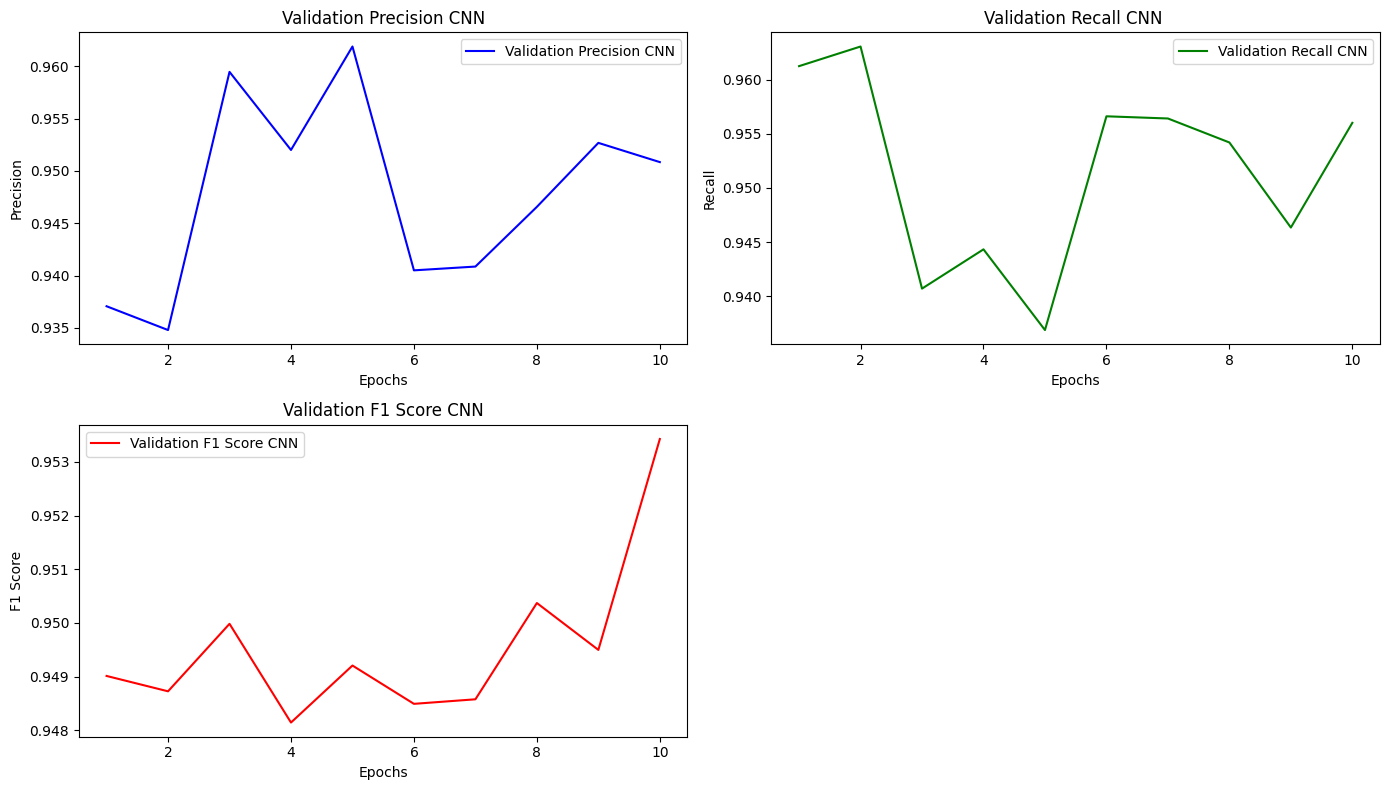

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

valid_precision_epochs = []
valid_recall_epochs = []
valid_f1_epochs = []

for all_labels, all_preds in zip(all_labels_epochs, all_preds_epochs):
    precision = precision_score(all_labels, all_preds, average='binary')
    recall = recall_score(all_labels, all_preds, average='binary')
    f1 = f1_score(all_labels, all_preds, average='binary')
    valid_precision_epochs.append(precision)
    valid_recall_epochs.append(recall)
    valid_f1_epochs.append(f1)

# Plot the stored values
epochs = range(1, n_epochs + 1)

plt.figure(figsize=(14, 8))

# Plot Precision
plt.subplot(2, 2, 1)
plt.plot(epochs, valid_precision_epochs, 'b', label='Validation Precision CNN')
plt.title('Validation Precision CNN')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

# Plot Recall
plt.subplot(2, 2, 2)
plt.plot(epochs, valid_recall_epochs, 'g', label='Validation Recall CNN')
plt.title('Validation Recall CNN ')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

# Plot F1 Score
plt.subplot(2, 2, 3)
plt.plot(epochs, valid_f1_epochs, 'r', label='Validation F1 Score CNN')
plt.title('Validation F1 Score CNN')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()


# Restnet18

In [ ]:
# train_accs = []
# val_accs = []

# for epoch in range(n_epochs):
#     model_restnet18.train()  # Set model to training mode
#     running_loss = 0.0
#     train_correct = 0
#     train_total = 0

#     for inputs, labels in train_loader:
#         inputs, labels = inputs.to(device), labels.to(device)

#         optimizer.zero_grad()
#         outputs = model_restnet18(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()

#         _, predicted = torch.max(outputs.data, 1)
#         train_total += labels.size(0)
#         train_correct += (predicted == labels).sum().item()

#     train_acc = 100 * train_correct / train_total
#     train_accs.append(train_acc)

#     # Validation
#     model_restnet18.eval()  # Set model to evaluate mode
#     val_correct = 0
#     val_total = 0

#     with torch.no_grad():
#         for inputs, labels in valid_loader:
#             inputs, labels = inputs.to(device), labels.to(device)
#             outputs = model_restnet18(inputs)
#             _, predicted = torch.max(outputs.data, 1)
#             val_total += labels.size(0)
#             val_correct += (predicted == labels).sum().item()

#     val_acc = 100 * val_correct / val_total
#     val_accs.append(val_acc)

#     print(f'Epoch {epoch+1}/{n_epochs}, Loss: {running_loss/len(train_loader)}, Train Acc: {train_acc}%, Val Acc: {val_acc}%')


Epoch 1/10, Loss: 0.21060592453818208, Train Acc: 91.69333333333333%, Val Acc: 91.57%
Epoch 2/10, Loss: 0.15054689540431418, Train Acc: 94.22444444444444%, Val Acc: 94.52%
Epoch 3/10, Loss: 0.12645934659185154, Train Acc: 95.27222222222223%, Val Acc: 92.21%
Epoch 4/10, Loss: 0.10566801916350341, Train Acc: 96.01444444444445%, Val Acc: 96.07%
Epoch 5/10, Loss: 0.09148007668291576, Train Acc: 96.47555555555556%, Val Acc: 96.12%
Epoch 6/10, Loss: 0.07652432060964542, Train Acc: 97.10444444444444%, Val Acc: 96.1%


In [ ]:
?


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 80.1MB/s]


Epoch 1/10, Loss: 0.20888675672491802, Train Acc: 91.77555555555556%, Val Acc: 94.69%
Epoch 2/10, Loss: 0.15076610206805469, Train Acc: 94.19444444444444%, Val Acc: 95.2%
Epoch 3/10, Loss: 0.12443835338080349, Train Acc: 95.22222222222223%, Val Acc: 96.07%
Epoch 4/10, Loss: 0.10414849584303079, Train Acc: 96.02111111111111%, Val Acc: 96.13%
Epoch 5/10, Loss: 0.08793694287874738, Train Acc: 96.68444444444444%, Val Acc: 96.32%
Epoch 6/10, Loss: 0.0733100613009286, Train Acc: 97.22888888888889%, Val Acc: 96.81%
Epoch 7/10, Loss: 0.059613095006575745, Train Acc: 97.79666666666667%, Val Acc: 96.9%
Epoch 8/10, Loss: 0.04688484994115411, Train Acc: 98.20777777777778%, Val Acc: 96.78%
Epoch 9/10, Loss: 0.03796155153741714, Train Acc: 98.56777777777778%, Val Acc: 96.9%
Epoch 10/10, Loss: 0.03194457798937806, Train Acc: 98.80444444444444%, Val Acc: 96.58%


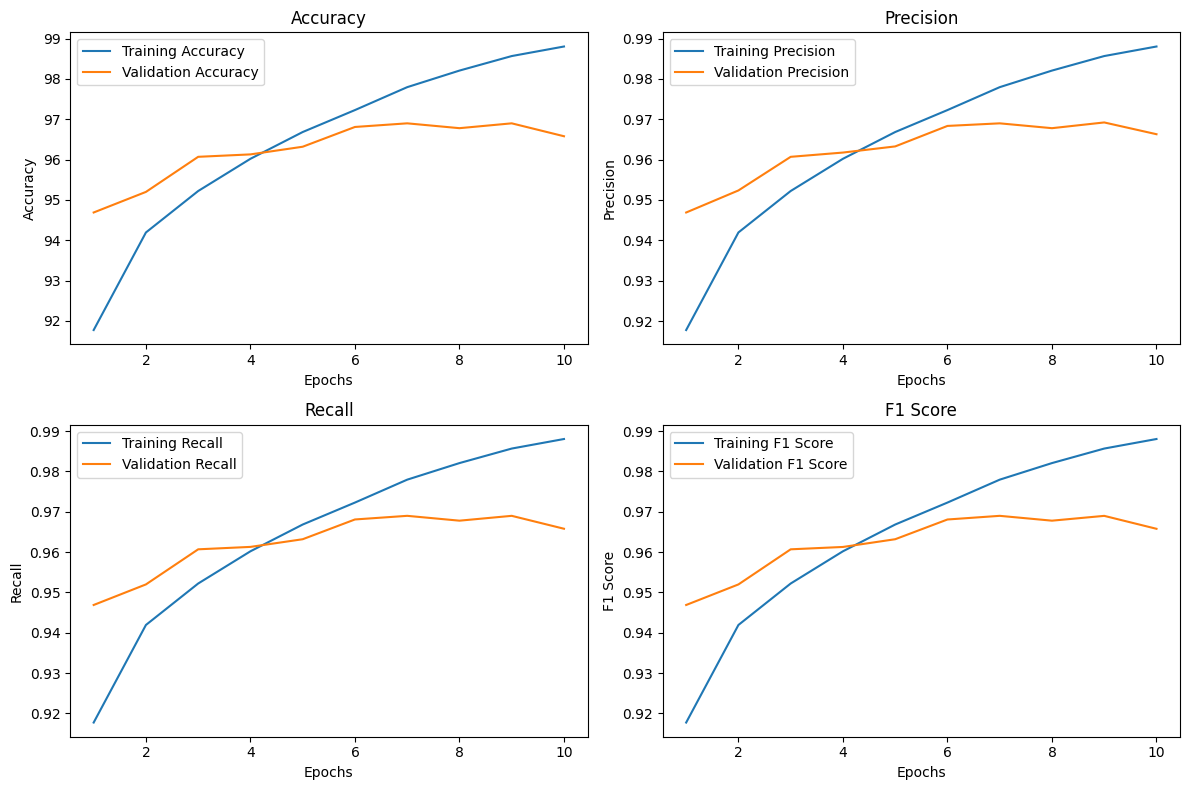

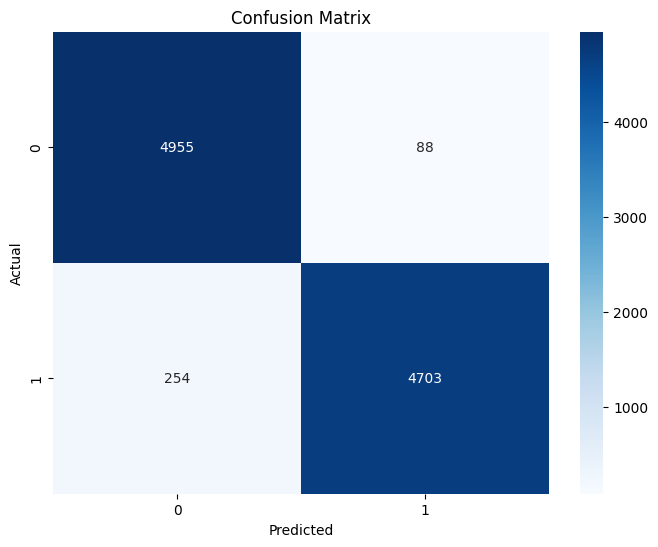

Final Training Accuracy: 98.80444444444444
Final Validation Accuracy: 96.58
Final Training Precision: 0.9880444578381078
Final Validation Precision: 0.9663045401607505
Final Training Recall: 0.9880444444444444
Final Validation Recall: 0.9658
Final Training F1 Score: 0.9880444433344954
Final Validation F1 Score: 0.9657856843649992
Final Training AUC: 0.98804434858963
Final Validation AUC: 0.9656546998215988
Test Accuracy: 96.54%
Test Precision: 0.9659197614490822
Test Recall: 0.9654
Test F1 Score: 0.9653903477140738
Test AUC: 0.9654


In [11]:
from google.colab import drive
import zipfile
import os
from torchvision import models, transforms, datasets
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Initialize the ResNet-18 model, criterion, optimizer
model_resnet18 = models.resnet18(pretrained=True)
num_ftrs = model_resnet18.fc.in_features
model_resnet18.fc = nn.Linear(num_ftrs, 2)  # Binary classification

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_resnet18 = model_resnet18.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_resnet18.parameters(), lr=0.001)

# Training settings
n_epochs = 10
best_val_acc = 0
train_accs = []
val_accs = []
train_precisions = []
val_precisions = []
train_recalls = []
val_recalls = []
train_f1s = []
val_f1s = []
train_aucs = []
val_aucs = []
best_model_path = "best_model.pth"

# Define checkpoint save function
def save_checkpoint(state, filename="checkpoint.pth"):
    torch.save(state, filename)

# Try to load the checkpoint if it exists
if os.path.isfile("checkpoint.pth"):
    checkpoint = torch.load("checkpoint.pth")
    model_resnet18.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint['epoch'] + 1
    train_accs = checkpoint['train_accs']
    val_accs = checkpoint['val_accs']
    best_val_acc = checkpoint['best_val_acc']
    best_model_path = checkpoint['best_model_path']
    print(f"Loaded checkpoint from epoch {checkpoint['epoch']}")
else:
    start_epoch = 0

# Training and validation loop
for epoch in range(start_epoch, n_epochs):
    model_resnet18.train()  # Set model to training mode
    running_loss = 0.0
    train_correct = 0
    train_total = 0
    train_preds = []
    train_labels = []

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model_resnet18(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
        train_preds.extend(predicted.cpu().numpy())
        train_labels.extend(labels.cpu().numpy())

    train_acc = 100 * train_correct / train_total
    train_accs.append(train_acc)
    train_precision = precision_score(train_labels, train_preds, average='weighted')
    train_precisions.append(train_precision)
    train_recall = recall_score(train_labels, train_preds, average='weighted')
    train_recalls.append(train_recall)
    train_f1 = f1_score(train_labels, train_preds, average='weighted')
    train_f1s.append(train_f1)
    train_auc = roc_auc_score(train_labels, np.array(train_preds))
    train_aucs.append(train_auc)

    # Validation
    model_resnet18.eval()  # Set model to evaluate mode
    val_correct = 0
    val_total = 0
    val_preds = []
    val_labels = []

    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_resnet18(inputs)
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
            val_preds.extend(predicted.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    val_acc = 100 * val_correct / val_total
    val_accs.append(val_acc)
    val_precision = precision_score(val_labels, val_preds, average='weighted')
    val_precisions.append(val_precision)
    val_recall = recall_score(val_labels, val_preds, average='weighted')
    val_recalls.append(val_recall)
    val_f1 = f1_score(val_labels, val_preds, average='weighted')
    val_f1s.append(val_f1)
    val_auc = roc_auc_score(val_labels, np.array(val_preds))
    val_aucs.append(val_auc)

    # Save the best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_model_path = "best_model.pth"
        save_checkpoint({
            'epoch': epoch,
            'model_state_dict': model_resnet18.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_accs': train_accs,
            'val_accs': val_accs,
            'best_val_acc': best_val_acc,
            'best_model_path': best_model_path
        }, best_model_path)

    print(f'Epoch {epoch+1}/{n_epochs}, Loss: {running_loss/len(train_loader)}, Train Acc: {train_acc}%, Val Acc: {val_acc}%')

# Save final checkpoint at the end of training
save_checkpoint({
    'epoch': epoch,
    'model_state_dict': model_resnet18.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train_accs': train_accs,
    'val_accs': val_accs,
    'best_val_acc': best_val_acc,
    'best_model_path': best_model_path
})

# Plotting Results
epochs = range(1, n_epochs + 1)
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(epochs, train_accs, label='Training Accuracy')
plt.plot(epochs, val_accs, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, train_precisions, label='Training Precision')
plt.plot(epochs, val_precisions, label='Validation Precision')
plt.title('Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(epochs, train_recalls, label='Training Recall')
plt.plot(epochs, val_recalls, label='Validation Recall')
plt.title('Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(epochs, train_f1s, label='Training F1 Score')
plt.plot(epochs, val_f1s, label='Validation F1 Score')
plt.title('F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()

plt.tight_layout()
plt.show()

# Confusion Matrix
val_preds = np.array(val_preds)
val_labels = np.array(val_labels)
conf_matrix = confusion_matrix(val_labels, val_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print final evaluation metrics
print(f'Final Training Accuracy: {train_accs[-1]}')
print(f'Final Validation Accuracy: {val_accs[-1]}')
print(f'Final Training Precision: {train_precisions[-1]}')
print(f'Final Validation Precision: {val_precisions[-1]}')
print(f'Final Training Recall: {train_recalls[-1]}')
print(f'Final Validation Recall: {val_recalls[-1]}')
print(f'Final Training F1 Score: {train_f1s[-1]}')
print(f'Final Validation F1 Score: {val_f1s[-1]}')
print(f'Final Training AUC: {train_aucs[-1]}')
print(f'Final Validation AUC: {val_aucs[-1]}')

# Testing
model_resnet18.eval()  # Set model to evaluate mode
test_correct = 0
test_total = 0
test_preds = []
test_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_resnet18(inputs)
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()
        test_preds.extend(predicted.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())

test_acc = 100 * test_correct / test_total
test_precision = precision_score(test_labels, test_preds, average='weighted')
test_recall = recall_score(test_labels, test_preds, average='weighted')
test_f1 = f1_score(test_labels, test_preds, average='weighted')
test_auc = roc_auc_score(test_labels, np.array(test_preds))

print(f'Test Accuracy: {test_acc}%')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1 Score: {test_f1}')
print(f'Test AUC: {test_auc}')
